<a href="https://colab.research.google.com/github/matthewreed2000/cse380-notebooks/blob/master/12_3_About_Deterministic_Finite_Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Deterministic Finite Automata
## Class Directed Learning
### Due: Tuesday, 23 March 2021, 11:59 pm

*Matthew Reed*

In collaboration with:
- Paul Semadeni
- Clair Hocker

Any study of Deterministic Finite Automata (DFA) would be incomplete without looking into "Language Recognition" --- an area of discrete math that leads us into territory abounding in rich structures and powerful ideas.

The notion of a finite-state machine **with** output generalizes to the notion of a finite-state machine (aka a finite automaton) with **no** output, but with important computational abilities.

For now, we focus on **deterministic** computations.


For all of the following examples and tasks, the alphabet is $\Sigma = \{0, 1\}$, and the idea is to construct a DFA serving as a language recognizer for the given languages.

## Example 1

The language

$L_0 = \{x0\ |\ x \in \Sigma^*\}$

needs two states in order to:

1. Accept strings that end in 0.
2. Reject strings that end in 1.

In [1]:
from graphviz import Source

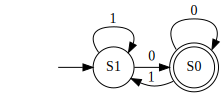

In [2]:
last_bit_is_zero = '''
digraph {
  node [shape=circle]
  empty [shape=none label=""]
  S0 [shape=doublecircle]
  S1
  empty -> S1 [label="" headport=w]
  S1 -> S1 [label=1 headport=ne tailport=nw]
  S1 -> S0 [label=0]
  S0 -> S0 [label=0 headport=ne tailport=nw]
  S0 -> S1 [label=1]
  {rank=same empty S1 S0}
}
'''
Source(last_bit_is_zero)

## Example 2

The language

$L_1 = \{x0z\ |\ x \in \Sigma^*, z \in \Sigma\}$

needs four states in order to:

1. Accept strings that end in 00 or 01.
2. Reject strings that end in 10 or 11.

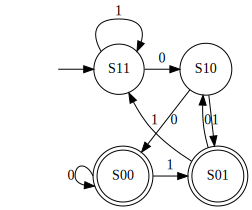

In [3]:
second_to_last_bit_is_zero = '''
digraph {
  node [shape=circle]
  empty [shape=none label=""]
  S11
  S10
  S00 [shape=doublecircle]
  S01 [shape=doublecircle]

  empty -> S11 [label="" headport=w]
  S11 -> S10 [label=0]
  S11 -> S11 [label=1 headport=ne tailport=nw]
  S10 -> S00 [label=0]
  S10 -> S01 [label=1]
  S00 -> S00 [label=0 tailport=w]
  S00 -> S01 [label=1]
  S01 -> S10 [label=0]
  S01 -> S11 [label=1]
  {rank=same empty S11 S10}
  {rank=same S01 S00}
}
'''
Source(second_to_last_bit_is_zero)

## Task 1

Construct a DFA to recognize the language

$L_2 = \{x0z\ |\ x \in \Sigma^*, z \in \Sigma^2\}$.

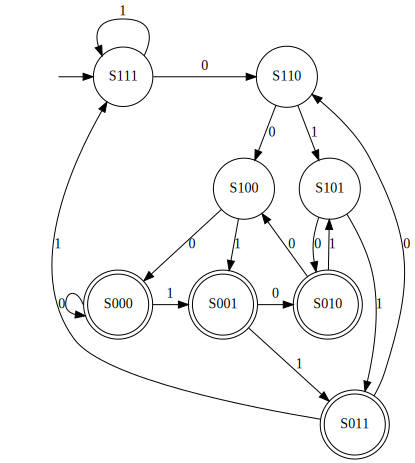

In [3]:
third_to_last_bit_is_zero = '''
digraph {
  node [shape=circle]
  empty [shape=none label=""]
  S110
  S100
  S111
  S101
  S000 [shape=doublecircle]
  S010 [shape=doublecircle]
  S001 [shape=doublecircle]
  S011 [shape=doublecircle]

  empty -> S111 [label=""]
  S111 -> S110 [label=0]
  S111 -> S111 [label=1 tailport=ne headport=nw]
  S110 -> S100 [label=0]
  S110 -> S101 [label=1]
  S101 -> S010 [label=0]
  S101 -> S011 [label=1]
  S100 -> S000 [label=0]
  S100 -> S001 [label=1]
  S011 -> S110 [label=0]
  S011 -> S111 [label=1]
  S010 -> S100 [label=0]
  S010 -> S101 [label=1]
  S001 -> S010 [label=0]
  S001 -> S011 [label=1]
  S000 -> S000 [label=0 tailport=w]
  S000 -> S001 [label=1]
  {rank=same empty S111 S110}
  {rank=same S101 S100}
  {rank=same S011}
  {rank=same S001 S000 S010}
}
'''
Source(third_to_last_bit_is_zero)

## TODO Task 2

In [1]:
def get_graph(length):
  dot = '''
  digraph {
    node [shape=circle]
    empty [shape=none label=""]'''
  dot = ''.join([x[2:] + '\n' for x in dot.split('\n')])

  for x in range(2 ** (length - 1)):
    dot += "  S1" + bin(x)[2:].zfill(length - 1) + '\n'
  for x in range(2 ** (length - 1)):
    dot += "  S0" + bin(x)[2:].zfill(length - 1) + ' [shape=doublecircle]\n'

  dot += '\n  empty -> S' + ('1' * length) + ' [label=\"\"]\n'
  for x in range(2 ** length):
    current = bin(x)[2:].zfill(length)
    dot += "  S" + current + " -> S" + current[1:] + '0 [label=0]\n'
    dot += "  S" + current + " -> S" + current[1:] + '1 [label=1]\n'

  dot += '}\n'
  return dot

print(get_graph(3))


digraph {
  node [shape=circle]
  empty [shape=none label=""]
  S100
  S101
  S110
  S111
  S000 [shape=doublecircle]
  S001 [shape=doublecircle]
  S010 [shape=doublecircle]
  S011 [shape=doublecircle]

  empty -> S111 [label=""]
  S000 -> S000 [label=0]
  S000 -> S001 [label=1]
  S001 -> S010 [label=0]
  S001 -> S011 [label=1]
  S010 -> S100 [label=0]
  S010 -> S101 [label=1]
  S011 -> S110 [label=0]
  S011 -> S111 [label=1]
  S100 -> S000 [label=0]
  S100 -> S001 [label=1]
  S101 -> S010 [label=0]
  S101 -> S011 [label=1]
  S110 -> S100 [label=0]
  S110 -> S101 [label=1]
  S111 -> S110 [label=0]
  S111 -> S111 [label=1]
}



Construct a DFA to recognize the language

$L_3 = \{x0z\ |\ x \in \Sigma^*, z \in \Sigma^3\}$.

## TODO Task 3

Construct a DFA to recognize the language

$L_4 = \{x0z\ |\ x \in \Sigma^*, z \in \Sigma^4\}$.